In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
# Modify path to find code directory:
import sys
sys.path.append('../code/')

import networkx as nx
import matplotlib.pyplot as plt
import scipy as sp
import itertools


In [3]:
from structures import *


In [4]:
agents = [
    Agent(receptivity=0.5,persuasiveness=0.5),
    Agent(receptivity=0.5,persuasiveness=0.5),
    Agent(receptivity=0.5,persuasiveness=0.5),
    Agent(receptivity=0.5,persuasiveness=0.5),
    Agent(receptivity=0.5,persuasiveness=0.5),
]

# Add some connections (only use inner circle):
agents[0].inner_circle.append(agents[1].id)
agents[1].inner_circle.append(agents[0].id)
agents[1].inner_circle.append(agents[2].id)
agents[2].inner_circle.append(agents[1].id)
agents[1].inner_circle.append(agents[3].id)
agents[3].inner_circle.append(agents[1].id)
agents[3].inner_circle.append(agents[4].id)
agents[4].inner_circle.append(agents[3].id)

# - REMINDER - Do we want to have connections automatically propagate both ways when specified?

# Build simulation environment:
env = Environment(agents, seed=182)
print(env)


<Environment with 0/5 informed agents>


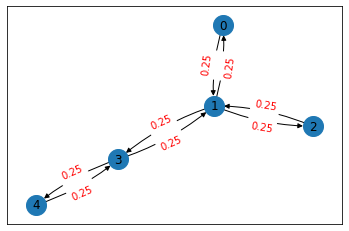

In [5]:
env.plot_network_graph()


In [23]:
env.update_transition_matrix(intervention_n=2)


In [25]:
env.T.shape


(10, 32, 32)

In [87]:
def initialize_values(state_space):
    """
    Value array for states (1D)
    """
    values = np.zeros(len(state_space))
    return values

def initialize_rewards(state_space):
    """
    Create a R(s,'s) matrix (reward can be thought of as independent of action)
    The reward is equal to the increase in the number of agents influenced
    """
    R = np.zeros((len(state_space), len(state_space)))
    for i, state1 in enumerate(state_space):
        for j, state2 in enumerate(state_space):
            reward = np.max((0, (np.sum(state2) - np.sum(state1))))
            R[i,j] = reward
    return R
    

In [81]:
def calculate_policy_value(env, policy):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-81-45956f9ac6df>, line 2)

In [88]:
# Implement policy iteration algorithm

# Initialize a policy and MDP problem setup
policy = np.zeros(len(env.state_space), dtype=int)
rewards = initialize_rewards(env.state_space)
values = initialize_values(env.state_space)


(32,)